## 

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

def audio_trim(wav, length, threshold=10):
    # split an audio signal into non-silent intervals.
    non_silence_parts = librosa.effects.split(wav, top_db=threshold)
    output = np.concatenate([wav[s:e] for s, e in non_silence_parts])
    output = output[1:length+1]
    return output

if __name__ == '__main__':
    wav_file_path = '../audio/wang//test_data/20170001P00235A0066.wav'

    wav, _ = librosa.load(wav_file_path, sr=44100)
    plt.plot(wav)
    plt.show()

    output_part = audio_trim(wav, 20000)
    print("shape", np.shape(output_part))
    plt.plot(output_part)
    plt.show()



In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import sklearn.preprocessing



def audio_trim(wav, length, threshold=10):
    # split an audio signal into non-silent intervals.
    non_silence_parts = librosa.effects.split(wav, top_db=threshold)
    output = np.concatenate([wav[s:e] for s, e in non_silence_parts])
    output = output[1:length+1]
    return output


if __name__ == '__main__':
    # raw audio file folder path
    audio_folder_path = '../audio/'
    # mfcc data and labels files path
    dataset_file_path = 'dataset.npy'
    label_file_path = 'labels.npy'

    # get all speakers
    speakers = os.listdir(audio_folder_path)
    print("\nspeakers:", speakers, "\nlen:", len(speakers))

    dataset = []
    labels = []

    for speaker in speakers:
        cnt = 0
        wav_files = os.listdir(audio_folder_path + speaker + '/train_data/')
        for wav_file in wav_files:
            # print(speaker, 'wav file: ', wav_file)
            if '.wav' in wav_file:
                # load wav file
                wav, sr = librosa.load(path=audio_folder_path + speaker + '/train_data/' + wav_file, sr=16000)
                # The actual speaking time is about 2s
                wav = audio_trim(wav=wav, length=16384, threshold=30)
                # extract mfcc geature
                mfcc = librosa.feature.mfcc(y=wav, sr=sr, 
                                window='hamming', 
                                win_length=512,
                                hop_length=384,
                                n_fft=2048,
                                n_mels=32,
                                n_mfcc=32)
                
                dataset.append(mfcc)
                labels.append(speaker)
                cnt += 1

                if (cnt % 60 == 0):
                    scaler = sklearn.preprocessing.MinMaxScaler()
                    normalize_mfcc = scaler.fit_transform(mfcc)
                    # print(np.square(normalize_mfcc))
                    print(speaker, np.shape(mfcc))
                    plt.imshow(np.square(normalize_mfcc))
                    plt.show()
                # print(speaker, cnt, np.shape(mfcc))

    # np.save(dataset_file_path, np.array(dataset))
    # np.save(label_file_path, np.array(labels))
   



speakers: ['aaa', 'bbb', 'ccc', 'ddd'] 
len: 4
aaa (8, 22)
[[-1.77602371e+02 -1.70347565e+02 -1.18271660e+02 -1.00719620e+02
  -9.81824493e+01 -9.50806656e+01 -1.00585121e+02 -1.02151527e+02
  -9.39745712e+01 -1.01099586e+02 -1.08743515e+02 -1.06933258e+02
  -9.69480515e+01 -1.13979721e+02 -1.18359039e+02 -1.11443222e+02
  -1.28218277e+02 -1.22968109e+02 -1.40100616e+02 -1.42241302e+02
  -1.33080734e+02 -1.03719276e+02]
 [ 2.47489700e+01  2.73374939e+01  4.57285690e+01  6.64549866e+01
   6.60167084e+01  6.81873016e+01  6.90810852e+01  6.41790771e+01
   6.24065819e+01  6.92300262e+01  7.25536499e+01  6.67804184e+01
   5.25338516e+01  7.00656891e+01  6.87338181e+01  5.50376434e+01
   6.08243484e+01  5.01845207e+01  5.62414093e+01  6.07480736e+01
   5.48188782e+01  3.73450241e+01]
 [-6.41073370e+00 -7.72913837e+00 -2.61159492e+00 -2.00246811e-01
   3.79172593e-01  2.84895420e+00  3.13307619e+00  5.15886354e+00
   4.50509739e+00  5.78823614e+00  2.36028790e+00  4.19683075e+00
   9.0610351

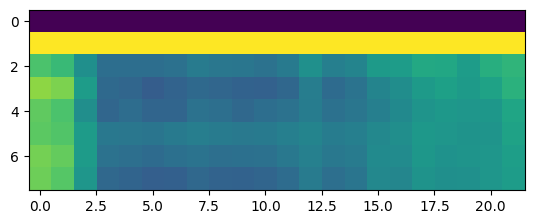

aaa (8, 22)
[[-1.70744232e+02 -1.63581100e+02 -1.22484734e+02 -1.06790710e+02
  -1.18415695e+02 -1.04338020e+02 -1.05810066e+02 -9.07500076e+01
  -9.93747864e+01 -9.47572021e+01 -1.01758743e+02 -9.24420395e+01
  -8.70850449e+01 -9.00361404e+01 -9.42055206e+01 -9.71666183e+01
  -1.10988731e+02 -1.19972084e+02 -1.30233231e+02 -1.36436493e+02
  -1.43079025e+02 -1.39179977e+02]
 [ 2.16646862e+01  2.81560555e+01  2.91190643e+01  3.16284485e+01
   3.72798958e+01  5.00958405e+01  6.61608124e+01  5.45098724e+01
   6.32634659e+01  5.53428268e+01  5.93517265e+01  5.57291260e+01
   5.31949158e+01  5.53806610e+01  5.52001762e+01  4.65896873e+01
   5.46990623e+01  5.66960754e+01  4.89953384e+01  5.01388931e+01
   5.27692795e+01  5.63305054e+01]
 [-5.84726620e+00 -9.76683319e-01 -2.12613411e+01 -2.32851753e+01
  -9.95366287e+00  6.74955654e+00  2.68171489e-01  8.51346111e+00
   2.41948152e+00  6.62195969e+00  4.87874413e+00  2.81270766e+00
   7.16735363e+00  1.11309090e+01  1.16511688e+01  1.4276718

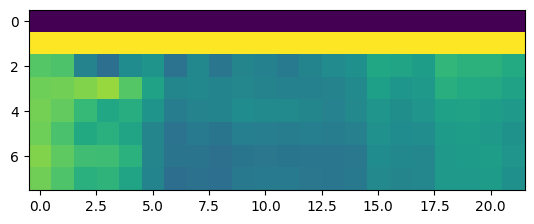

aaa (8, 22)
[[-1.61660019e+02 -1.36440979e+02 -1.25733543e+02 -1.21703522e+02
  -1.15710052e+02 -1.09501724e+02 -9.98742905e+01 -9.94386902e+01
  -9.76088638e+01 -9.09748154e+01 -9.11336899e+01 -9.48253174e+01
  -8.92107849e+01 -9.70661316e+01 -1.05075371e+02 -1.07208916e+02
  -9.55904999e+01 -9.39063034e+01 -9.16409988e+01 -9.17255707e+01
  -1.01969917e+02 -8.08414688e+01]
 [ 2.45403328e+01  2.79194870e+01  2.24661732e+01  2.07399902e+01
   2.07354069e+01  2.16836166e+01  1.97517509e+01  2.30436363e+01
   2.14517632e+01  1.98405361e+01  2.60007515e+01  2.60462685e+01
   2.84298019e+01  2.37875576e+01  3.22426529e+01  3.94426308e+01
   5.52340126e+01  4.97259827e+01  5.35846786e+01  5.51955795e+01
   6.78642731e+01  4.09783020e+01]
 [-1.88540993e+01 -2.31006260e+01 -3.14834995e+01 -3.61415787e+01
  -3.35107040e+01 -3.18405323e+01 -3.16571198e+01 -3.25282631e+01
  -3.88331490e+01 -3.38150711e+01 -3.51206245e+01 -3.29912376e+01
  -2.84006042e+01 -2.84307652e+01 -2.83319588e+01 -2.1517028

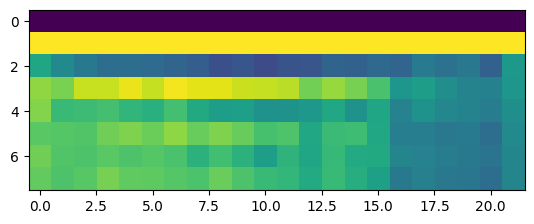

aaa (8, 22)
[[-1.76993500e+02 -1.69738663e+02 -1.38516876e+02 -1.15575401e+02
  -1.17538673e+02 -1.28219788e+02 -1.15748466e+02 -1.06637627e+02
  -1.02344154e+02 -1.00136574e+02 -1.02184845e+02 -1.03399651e+02
  -1.09705833e+02 -1.10834000e+02 -1.25185905e+02 -1.10903000e+02
  -1.29967056e+02 -1.20868919e+02 -1.34985016e+02 -1.15742401e+02
  -1.02392395e+02 -9.43059006e+01]
 [ 2.39044113e+01  2.64929352e+01  1.32800560e+01  1.90262413e+01
   2.05561981e+01  2.58298836e+01  4.25558624e+01  5.88719368e+01
   5.34121704e+01  5.48689651e+01  5.24399300e+01  5.82323227e+01
   6.25700607e+01  5.74584045e+01  7.09191742e+01  5.35821800e+01
   6.70255127e+01  5.04919357e+01  5.52237282e+01  4.76231232e+01
   3.78906975e+01  3.09486732e+01]
 [-5.61518097e+00 -6.93357944e+00 -2.46903095e+01 -2.85450115e+01
  -2.90592346e+01 -2.52968540e+01 -4.20766544e+00 -3.46262217e+00
   2.15495253e+00  1.64134729e+00  5.32259274e+00  5.40268612e+00
   9.47522354e+00  1.48155851e+01  6.92496157e+00  1.3025358

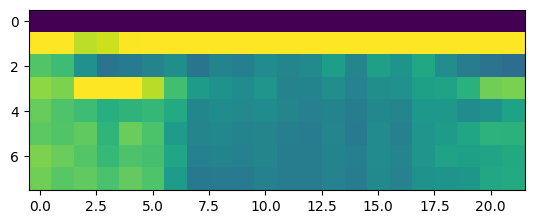

aaa (8, 22)
[[-1.74301468e+02 -1.33892242e+02 -1.28870712e+02 -1.32232712e+02
  -1.31853165e+02 -1.26597557e+02 -1.14633049e+02 -1.01537361e+02
  -1.08960129e+02 -1.02034332e+02 -9.27350082e+01 -9.74756241e+01
  -9.63506317e+01 -9.95309753e+01 -1.05053139e+02 -1.06895584e+02
  -1.09172104e+02 -1.22272110e+02 -1.14003380e+02 -1.35807785e+02
  -1.25514687e+02 -1.13176559e+02]
 [ 2.64178658e+01  4.14718513e+01  4.42623672e+01  5.27133713e+01
   5.19514694e+01  5.33726654e+01  5.89804726e+01  5.62640076e+01
   6.20247269e+01  5.77863922e+01  5.30906677e+01  6.50557404e+01
   6.19961205e+01  5.76205597e+01  5.96924820e+01  5.64046021e+01
   4.88471909e+01  6.32884293e+01  4.96719513e+01  6.40735321e+01
   5.21008530e+01  4.67890244e+01]
 [-9.83948994e+00 -2.08841496e+01 -2.58142014e+01 -1.91692390e+01
  -2.30655403e+01 -1.13384628e+01 -3.19612408e+00 -1.24284768e+00
  -6.70807743e+00 -3.19918156e+00  2.31355000e+00 -2.73327518e+00
  -1.60938358e+00  3.90029699e-01 -2.87223053e+00  2.7826628

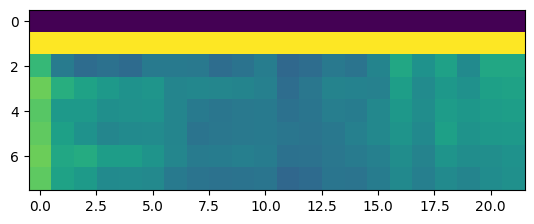

aaa (8, 22)
[[-1.74011688e+02 -1.61926437e+02 -1.01663994e+02 -1.27031189e+02
  -9.84560471e+01 -8.95996170e+01 -9.12275391e+01 -9.37803497e+01
  -9.05701065e+01 -8.77790375e+01 -8.88113403e+01 -1.00481735e+02
  -1.04743439e+02 -1.03601013e+02 -1.04201469e+02 -1.05922104e+02
  -1.08482971e+02 -1.12597496e+02 -1.13817131e+02 -1.03223412e+02
  -1.09886909e+02 -1.15261467e+02]
 [ 2.60159492e+01  3.55484390e+01  4.89554367e+01  4.54754562e+01
   6.03610039e+01  5.95867004e+01  6.11880112e+01  6.03191185e+01
   6.12390594e+01  6.07169571e+01  5.63073502e+01  5.63205223e+01
   5.52100754e+01  5.24321976e+01  6.08794937e+01  5.90007896e+01
   5.09173050e+01  5.40786133e+01  5.30236130e+01  4.92440872e+01
   5.75685806e+01  5.96252785e+01]
 [-9.46091270e+00 -4.12875271e+00 -1.39723682e+01 -5.37206888e+00
  -1.45918489e+00 -9.94985104e-01 -2.57662177e+00 -5.12917709e+00
  -2.03733492e+00  3.21082234e-01 -1.69377339e+00 -3.60866666e+00
  -6.47345424e-01  1.80813003e+00  1.10043788e+00  3.3319461

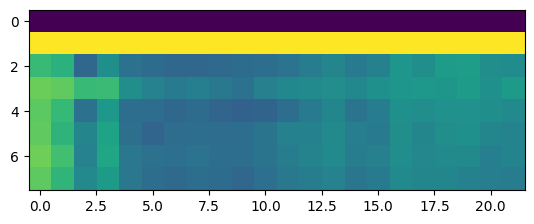

aaa (8, 22)
[[-1.75112350e+02 -1.74236420e+02 -1.66140793e+02 -1.45069397e+02
  -1.48640671e+02 -1.45444855e+02 -1.42781113e+02 -1.23267090e+02
  -1.35946762e+02 -1.26793320e+02 -1.16830315e+02 -1.27540718e+02
  -1.19197121e+02 -9.72463074e+01 -9.90911255e+01 -1.00264778e+02
  -9.67815475e+01 -1.02564667e+02 -1.12944443e+02 -1.16697701e+02
  -1.12773384e+02 -1.13180504e+02]
 [ 2.75426178e+01  3.49759598e+01  4.62317734e+01  4.15131378e+01
   5.10277863e+01  5.48490143e+01  5.63233566e+01  4.74228210e+01
   6.02866669e+01  6.18228989e+01  6.01415558e+01  7.32280426e+01
   6.71166992e+01  5.31161194e+01  5.33003006e+01  5.37933121e+01
   5.14312096e+01  5.55593109e+01  6.19459572e+01  6.30302277e+01
   6.08316040e+01  6.02972717e+01]
 [-1.08990040e+01 -5.83020496e+00  2.92083764e+00  1.20377903e+01
   1.32677383e+01  1.47901249e+01  1.68354244e+01  1.63386173e+01
   1.73184948e+01  1.72137394e+01  1.77376823e+01  1.60445881e+01
   1.57635126e+01  1.19609032e+01  1.05752068e+01  1.1354221

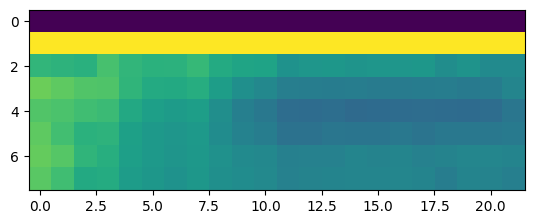

aaa (8, 22)
[[-1.76224442e+02 -1.70527664e+02 -1.61673706e+02 -1.01448586e+02
  -8.30802307e+01 -9.19885330e+01 -9.18470154e+01 -9.64527588e+01
  -9.83161926e+01 -1.07198578e+02 -1.02558815e+02 -1.03158051e+02
  -1.02492104e+02 -1.05742035e+02 -1.09368431e+02 -1.16241013e+02
  -1.18884827e+02 -1.18108818e+02 -1.22996162e+02 -1.28749207e+02
  -1.27687302e+02 -1.19109314e+02]
 [ 3.14197884e+01  4.72556458e+01  5.33888092e+01  6.15842438e+01
   5.50831642e+01  5.52006035e+01  5.47097931e+01  6.18454056e+01
   6.48055878e+01  6.52388916e+01  5.93809280e+01  5.19292603e+01
   4.99906502e+01  4.73501968e+01  4.64711494e+01  4.70923805e+01
   4.80196457e+01  5.20416946e+01  5.35130959e+01  4.87844505e+01
   4.44853363e+01  3.57093964e+01]
 [ 1.74446106e+00 -2.81567669e+00 -1.90953326e+00 -4.46860218e+00
  -9.11691856e+00 -4.21786880e+00 -1.63872838e+00 -2.41350937e+00
  -7.92739296e+00 -6.54558945e+00 -3.79077005e+00  7.02805805e+00
   3.05452251e+00  2.82676268e+00  1.31402612e+00  5.3038597

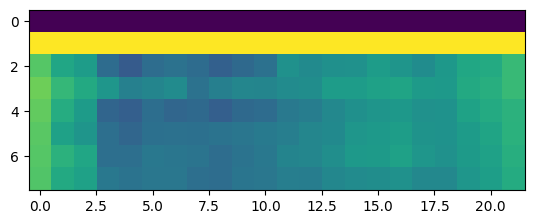

aaa (8, 22)
[[-1.74031021e+02 -1.61105179e+02 -1.41757187e+02 -1.22931679e+02
  -1.16293793e+02 -1.09984970e+02 -1.01910675e+02 -9.76484680e+01
  -9.47133560e+01 -9.13818130e+01 -9.32428436e+01 -9.39274979e+01
  -8.75545120e+01 -8.91279297e+01 -1.01689949e+02 -9.62521439e+01
  -9.57761536e+01 -1.00587708e+02 -9.66332550e+01 -1.05971512e+02
  -1.13023666e+02 -1.02254723e+02]
 [ 2.60427628e+01  4.08552742e+01  4.93012962e+01  6.04902267e+01
   6.44024048e+01  6.49302368e+01  6.29783669e+01  6.80577850e+01
   6.68431549e+01  6.84497528e+01  6.53597107e+01  6.52601089e+01
   6.19586258e+01  5.05425720e+01  6.11032791e+01  5.04939804e+01
   5.11387405e+01  5.90622635e+01  4.86067276e+01  4.89068298e+01
   4.81562424e+01  3.40377197e+01]
 [-9.48617458e+00 -1.97476387e+00  4.09097338e+00  7.92035532e+00
   9.58642292e+00  1.10143089e+01  7.38629484e+00  2.80289412e+00
   4.08656120e-01 -1.49579406e+00 -2.30199671e+00 -3.64777994e+00
  -5.36676216e+00  3.97456503e+00 -5.79520130e+00  1.9379690

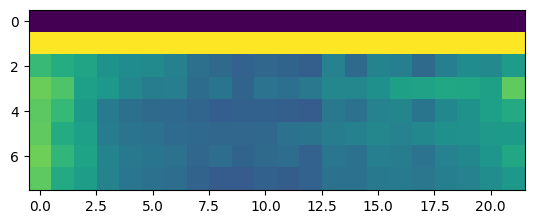

aaa (8, 22)
[[-164.41444    -148.73605    -128.21194    -117.38335    -106.69617
   -95.40158     -99.21924     -95.5404      -96.428635    -90.69514
   -85.02684     -83.7963      -85.54562     -83.15565     -78.22969
   -85.38525     -86.70173     -89.9194      -87.05293     -80.904854
   -89.0949      -76.36021   ]
 [  36.50745      40.23669      42.242073     45.08441      42.854305
    44.253628     42.301067     46.148804     38.770447     48.192314
    59.26599      55.71163      56.13951      56.674507     52.45262
    56.527855     55.972664     53.44464      57.48873      49.20166
    62.11445      40.26537   ]
 [  -2.387016    -17.509588    -19.52466     -22.227068    -25.93047
   -25.449486    -25.475628    -24.240736    -17.27542     -12.740719
   -14.156097     -3.2276332    -3.4626632    -7.0913095    -2.724366
    -4.9074736    -4.433237     -5.57879      -8.915781      1.0320177
    -6.2659264     5.3473797 ]
 [   2.1572883    -1.3954633     5.9168034     6.6627474    

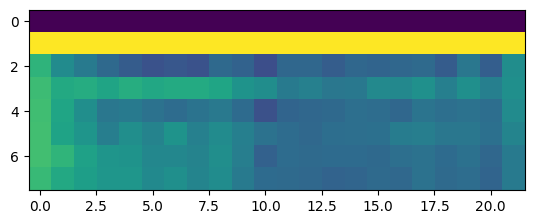

aaa (8, 22)
[[-1.79618790e+02 -1.30876358e+02 -1.28520004e+02 -1.32867371e+02
  -1.21214149e+02 -1.09406128e+02 -1.11223724e+02 -1.24252251e+02
  -1.10529976e+02 -9.81030350e+01 -9.58475800e+01 -1.03591660e+02
  -9.89135056e+01 -9.86438141e+01 -1.02736931e+02 -9.83897934e+01
  -1.00819534e+02 -1.10242233e+02 -1.25761314e+02 -1.29609528e+02
  -9.36231308e+01 -1.03072273e+02]
 [ 2.84462585e+01  4.42165451e+01  4.22104378e+01  4.02836914e+01
   5.11630707e+01  5.07395554e+01  5.50766830e+01  6.81846466e+01
   5.72827911e+01  5.17187729e+01  5.11757011e+01  5.78326263e+01
   5.78440323e+01  5.70633736e+01  6.12842789e+01  5.53927689e+01
   5.42505112e+01  5.08631058e+01  5.50159454e+01  5.16750793e+01
   4.20694122e+01  3.84632034e+01]
 [ 1.53036213e+00 -1.03231087e+01 -9.49835396e+00  6.47588015e-01
   1.19148216e+01  1.59777002e+01  1.96040154e+01  1.79115849e+01
   1.93611450e+01  1.74913635e+01  1.64092827e+01  1.48638868e+01
   1.09689503e+01  1.30977249e+01  5.18050909e+00  4.8451380

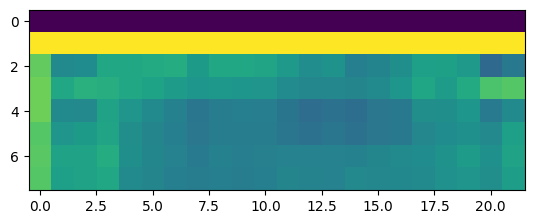

KeyboardInterrupt: 

In [3]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import sklearn.preprocessing



def audio_trim(wav, length, threshold=10):
    # split an audio signal into non-silent intervals.
    non_silence_parts = librosa.effects.split(wav, top_db=threshold)
    output = np.concatenate([wav[s:e] for s, e in non_silence_parts])
    output = output[1:length+1]
    return output


def mfcc_normalize(mfcc:np.ndarray,scale:tuple=(0,1)):
    ret = mfcc.copy()
    min, max = mfcc.min(),mfcc.max()
    
    ret = (ret - min) / (max - min)
    ret = ret * (scale[1] - scale[0]) + scale[0]
    return ret

if __name__ == '__main__':
    # raw audio file folder path
    audio_folder_path = '../audio/'
    # mfcc data and labels files path
    dataset_file_path = 'dataset.npy'
    label_file_path = 'labels.npy'

    # get all speakers
    speakers = os.listdir(audio_folder_path)
    print("\nspeakers:", speakers, "\nlen:", len(speakers))

    # dataset = []
    # labels = []

    scaler = sklearn.preprocessing.MinMaxScaler()
    # print all details of large array
    np.set_printoptions(threshold=np.inf)

    for speaker in speakers:
        wav_files = os.listdir(audio_folder_path + speaker + '/train_data/')
        for wav_file in wav_files:
            # print(speaker, 'wav file: ', wav_file)
            if '.wav' in wav_file:
                # load wav file
                wav, sr = librosa.load(path=audio_folder_path + speaker + '/train_data/' + wav_file, sr=44100)
                # The actual speaking time is about 2s
                wav = audio_trim(wav=wav, length=8192, threshold=30)
                # extract mfcc geature (remove the first row)
                mfcc = librosa.feature.mfcc(y=wav, sr=sr,
                                window='hamming',
                                win_length=512,
                                hop_length=384,
                                n_fft=2048,
                                n_mels=8,
                                n_mfcc=8)
                
                
                print(speaker, np.shape(mfcc))
                print(mfcc)
                print(normalize_mfcc)
                # dataset.append(mfcc)
                # labels.append(speaker)
                normalize_mfcc = scaler.fit_transform(mfcc)
                plt.imshow(np.square(normalize_mfcc))
                plt.show()
                # print(speaker, cnt, np.shape(mfcc))

    # np.save(dataset_file_path, np.array(dataset))
    # np.save(label_file_path, np.array(labels))
   


In [3]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import sklearn.preprocessing

if __name__ == '__main__':
    a = np.sqrt(np.arange(9).reshape(3,3))
    a_n = sklearn.preprocessing.minmax_scale(a)
    print(a)
    print(np.abs(a_n)) 
    pass

[[0.         1.         1.41421356]
 [1.73205081 2.         2.23606798]
 [2.44948974 2.64575131 2.82842712]]
[[0.         0.         0.        ]
 [0.70710678 0.60762522 0.58113883]
 [1.         1.         1.        ]]
